resizing images and masks....
7000
2000
2976
resizing images and masks....


100%|██████████| 2976/2976 [03:03<00:00, 16.26it/s]


Done resizing masks
(128, 128, 1)


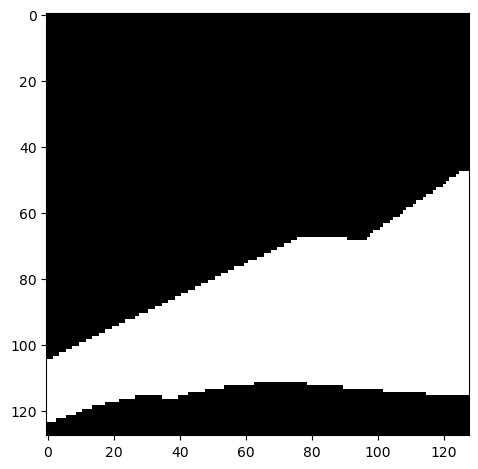

In [34]:
# -*- coding: utf-8 -*-


import tensorflow as tf
img_width, img_height,color_channels = 128,128,3
from keras.api._v2.keras.utils import Sequence
import glob

#convert pixel to float (div by 255)

#build model


import os 
import random
import numpy as np
from tqdm import tqdm 
from skimage.io import imread,imshow
from skimage.transform import resize 
import matplotlib.pyplot as plt 
import cv2
import glob
from tensorflow.python import keras


img_width,img_height,img_channels = 128,128,3


print('resizing images and masks....')
train_path = 'D:/neural networks/lanedetecor/bdd100k_images_10k/bdd100k/images/10k/train/'
test_path = 'D:/neural networks/lanedetecor/bdd100k_images_10k/bdd100k/images/10k/test/'
train_ids = next(os.walk(train_path))
test_ids = next(os.walk(test_path))
train_ids_rm = []
test_ids_rm = []

for item in train_ids[2]:
  item = item.replace(".jpg","")
  train_ids_rm.append(item)
for item in test_ids[2]:
  item = item.replace(".jpg","")
  test_ids_rm.append(item)

img_width,img_height,img_channels = 128,128,3


mask_path = next(os.walk("D:/neural networks/lanedetecor/bdd100k_drivable_labels_trainval/colormaps/train/"))[2]
mask_path_rm = []
for item in mask_path:
  item = item.replace(".png","")
  mask_path_rm.append(item)

print(len(train_ids_rm))
print(len(test_ids_rm))
print(len(mask_path_rm))
print('resizing images and masks....')

#############ONLY ONE TIME RUN #######################################3
import os
what_not_to_delete = [x for x in train_ids_rm if x in mask_path_rm ]
# print(len(what_not_to_delete))

# print(what_not_to_delete)
# parent_dir = "D:/neural networks/lanedetecor/bdd100k_drivable_labels_trainval/colormaps/train/"

# delete_kw = [x for x in mask_path_rm if x not in what_not_to_delete]
# for filename in delete_kw:
#     os.remove(parent_dir+filename+".png")
########################################################################

X_train = np.zeros((len(what_not_to_delete),img_height,img_width,img_channels),dtype=np.uint8)
y_train = np.zeros((len(what_not_to_delete),img_height,img_width,1),dtype=bool)


for n,mask_file in tqdm(enumerate(what_not_to_delete),total=len(what_not_to_delete)):
  mask = np.zeros((img_height,img_width,1),dtype=bool)
  
    # print(next(os.walk("bdd100k_drivable_labels_trainval/colormaps/train"))[2])
  mask_ = cv2.imread("D:/neural networks/lanedetecor/bdd100k_drivable_labels_trainval/colormaps/train/"+mask_file+".png")
  gray = cv2.cvtColor(mask_,cv2.COLOR_BGR2GRAY)
  mask_ = np.expand_dims(resize(gray,(img_height,img_width),mode='constant',preserve_range=True),axis=-1)
  mask = np.maximum(mask,mask_)
  y_train[n] = mask
  # y_train[n] = mask_
print("Done resizing masks")
print(y_train[0].shape)
imshow(y_train[0].astype(float))
plt.show()



# print(len(train_paths))


# core = cv2.imread('./bdd100k_images_10k/bdd100k/images/10k/train/00054602-3bf57337.jpg')
# img = cv2.imread('bdd100k_drivable_labels_trainval/colormaps/train/00054602-3bf57337.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.imshow(img, cmap='gray')
# plt.subplot(122)
# plt.imshow(core)
# plt.show()


In [36]:
for n,id_ in tqdm(enumerate(what_not_to_delete),total=len(what_not_to_delete)):
  
  path = train_path+id_
  img = imread(path+'.jpg')[:,:,:img_channels]
  img = resize(img,(img_height,img_width),mode="constant",preserve_range=True)
  X_train[n] = img
  
print("Done resizing images")
print(X_train[0].shape)
imshow(X_train[0]) 
plt.show()

  2%|▏         | 57/2976 [00:10<09:18,  5.22it/s]


KeyboardInterrupt: 

Done resizing images
(128, 128, 3)


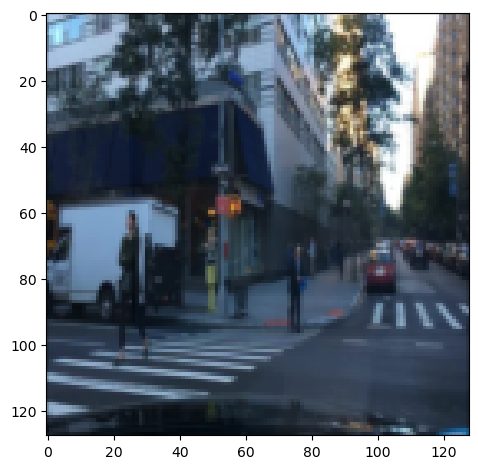

In [37]:
print("Done resizing images")
print(X_train[1].shape)
imshow(X_train[1]) 
plt.show()

resizing test images


100%|██████████| 2000/2000 [05:05<00:00,  6.55it/s]


Done resizing test images --->


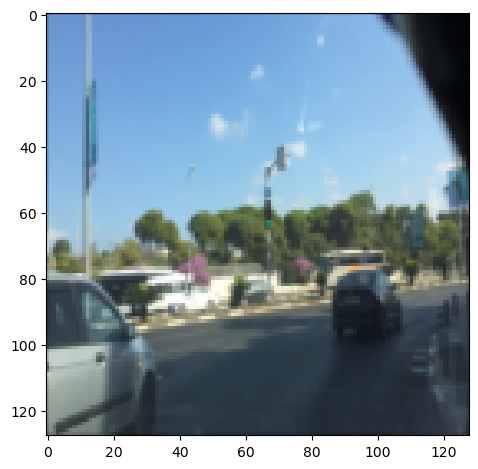

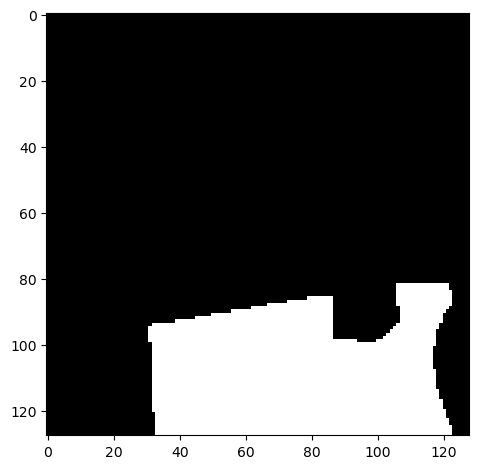

In [4]:
#test images
X_test = np.zeros((len(what_not_to_delete),img_height,img_width,img_channels),dtype=np.uint8)
sizes_test = []
print('resizing test images')
for n,id_ in tqdm(enumerate(test_ids_rm),total=len(test_ids_rm)):
  path = test_path+id_
  img = cv2.imread(path+".jpg")[:,:,:img_channels]
  sizes_test.append([img.shape[0],img.shape[1]])
  img = resize(img,(img_height,img_width),mode="constant",preserve_range=True)
  X_test[n] = img
print("Done resizing test images --->")
image_x = random.randint(0,len(what_not_to_delete))
imshow(X_train[image_x])
plt.show()
imshow(y_train[image_x].astype(float))
plt.show()

In [16]:
######################## HELPER FUNCTION ######################################
# what_not_to_delete = [x for x in train_ids_rm if x in mask_path_rm ]

# # print(what_not_to_delete)
# parent_dir = "D:/neural networks/lanedetecor/bdd100k_drivable_labels_trainval/colormaps/train/"

# delete_kw = [x for x in mask_path_rm if x not in what_not_to_delete]
# for filename in delete_kw:
#     os.remove(parent_dir+filename+".png")

# # new_mask_rm = len(os.listdir(parent_dir))
# # print(new_mask_rm)
# # new_mask_rm = len(os.listdir("D:/neural networks/lanedetecor/bdd100k_drivable_labels_trainval/colormaps/train"))
# # print(len(new_mask_rm))

       


In [38]:

#constrictor
inputs = tf.keras.layers.Input((img_width,img_height,color_channels))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256,(3,3),activation="relu",padding="same",kernel_initializer="he_normal")(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation="relu",padding="same",kernel_initializer="he_normal")(c5)

#upsampling 
u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)

u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c9)

outputs = tf.keras.layers.Conv2D(1,(1,1),activation="sigmoid")(c9)

model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

#######################################################################
#model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('for_model.h5',verbose=1,save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4,monitor="val_loss"),
    tf.keras.callbacks.TensorBoard(log_dir='D:/neural networks/lanedetecor/logs')
]

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 128, 128, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            

In [39]:
results = model.fit(X_train,y_train,validation_split=0.1,batch_size = 19,epochs = 30,callbacks=callbacks)

Epoch 1/30
141/141 [==============================] - 71s 441ms/step - loss: 0.4170 - accuracy: 0.8168 - val_loss: 0.3311 - val_accuracy: 0.8418
Epoch 2/30
141/141 [==============================] - 55s 392ms/step - loss: 0.2790 - accuracy: 0.8717 - val_loss: 0.2414 - val_accuracy: 0.8854
Epoch 3/30
141/141 [==============================] - 55s 392ms/step - loss: 0.2236 - accuracy: 0.8976 - val_loss: 0.2275 - val_accuracy: 0.8931
Epoch 4/30
141/141 [==============================] - 56s 396ms/step - loss: 0.2065 - accuracy: 0.9071 - val_loss: 0.1844 - val_accuracy: 0.9178
Epoch 5/30
141/141 [==============================] - 56s 394ms/step - loss: 0.1892 - accuracy: 0.9165 - val_loss: 0.1961 - val_accuracy: 0.9151
Epoch 6/30
141/141 [==============================] - 56s 394ms/step - loss: 0.1702 - accuracy: 0.9264 - val_loss: 0.1566 - val_accuracy: 0.9331
Epoch 7/30
141/141 [==============================] - 55s 394ms/step - loss: 0.1597 - accuracy: 0.9316 - val_loss: 0.1481 - val_ac

93/93 [==============================] - 15s 159ms/step


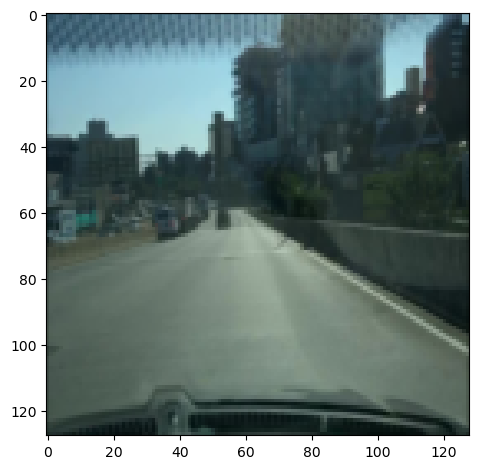

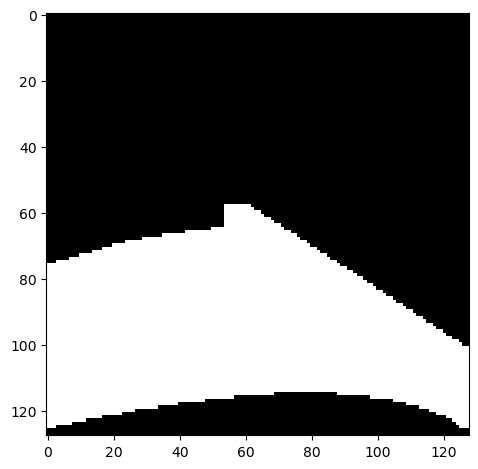

c:\Users\Asus\anaconda3\envs\torch-gpu\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


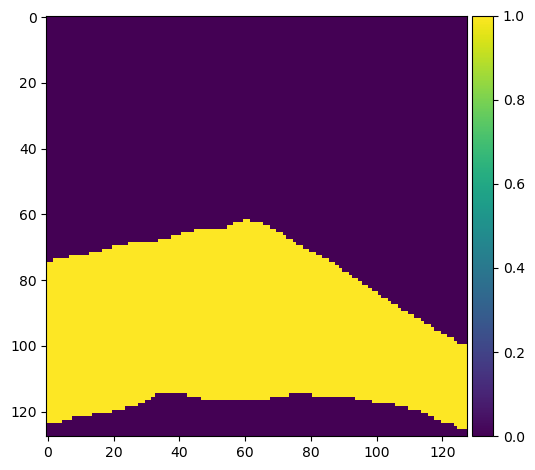

In [41]:
idx = random.randint(0,len(X_train))
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_test = model.predict(X_test,verbose = 1)
seed = 40
random.seed = seed

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

ix = random.randint(0,len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix].astype(float)))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()




# ix = random.randint(0,len(preds_val_t))
# imshow(X_train[int(X_train.shape[0]*0.9):][ix])
# plt.show()
# imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix].astype(float)))
# plt.show()
# imshow(np.squeeze(preds_val_t[ix]))
# plt.show()



In [40]:
ix = random.randint(0,len(preds_train_t))
print(X_train[ix])
# imshow(X_train[ix])
# plt.show()
# print(y_train[ix].shape)
# np.squeeze(y_train[ix].astype(float))
# imshow(X_train[ix])
# plt.show()
# imshow(np.squeeze(y_train[ix].astype(float)))
# plt.show()
# imshow(np.squeeze(preds_train_t[ix]))
# plt.show()

[[[ 63  77 117]
  [ 68  90 133]
  [ 28  48  75]
  ...
  [ 68 127 197]
  [ 65 125 196]
  [ 55 108 170]]

 [[ 65  88 134]
  [ 76 112 165]
  [ 59  91 139]
  ...
  [ 77 144 223]
  [ 75 143 223]
  [ 64 123 193]]

 [[ 54  85 131]
  [ 57  97 148]
  [ 66 111 159]
  ...
  [ 78 145 224]
  [ 77 144 224]
  [ 65 124 194]]

 ...

 [[ 94  67  72]
  [111  79  90]
  [109  91 101]
  ...
  [ 32  39  44]
  [ 29  36  41]
  [ 24  31  34]]

 [[ 99  72  80]
  [104  86  97]
  [ 66  70  78]
  ...
  [ 39  48  57]
  [ 38  47  56]
  [ 34  41  49]]

 [[ 81  66  73]
  [ 65  63  72]
  [ 35  48  55]
  ...
  [ 33  40  51]
  [ 35  42  54]
  [ 28  34  44]]]
